In [1]:
#imports
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import requests

In [2]:
#função para downloads de arquivos
def download_file(url):
    file_path = url.split('/')[-1]
    resp = requests.get(url)
    with open(file_path, 'wb') as f:
        f.write(resp.content)
    return file_path

In [3]:
#rede de colaboração
#artigos na area de astrofisica, publicados entre 1993 e 2003
#lista de arestas
#numero de no e do outro no indicando o numero de arestas entre os 2, cada linha tem 2 nós

#baixa o arquivo
url = 'https://snap.stanford.edu/data/ca-AstroPh.txt.gz'
file_path = download_file(url)
file_path

'ca-AstroPh.txt.gz'

In [4]:
#read_edgelist vai ler o arquivo já q está em formato de lista de arestas

#18772 nós e 198110 arestas
G = nx.read_edgelist(file_path)
print(G)

Graph with 18772 nodes and 198110 edges


In [5]:
#0.1% de todas as arestas que podem existir na rede

nx.density(G)

0.0011244455715955115

In [7]:
#não é possivel chegar de um pesquisador a qualquer outro ( não é muito conexa)
nx.is_connected(G)

False

In [8]:
#existe 290 grupos nessa rede
nx.number_connected_components(G)

290

In [9]:
#aqui retorna um generator, por isso gera o erro
components = nx.connected_components(G)
len(nx.connected_components(G))

TypeError: object of type 'generator' has no len()

In [10]:
#convertendo pra lista e recebe todos os componentes e calcula o componente
#existe 290 componentes
components = nx.connected_components(G)
len(list(components))

290

In [11]:
#calculando o comprimento de cada componente
components = nx.connected_components(G)
sizes = []
for comp in components:
    sizes.append(len(comp))

In [12]:
#mesma função que a anterior só que mais compacta
components = nx.connected_components(G)
sizes = [len(comp) for comp in components]

In [13]:
#tamanhos do componentes conexas
#calculando as estatisticas com desgribe
#a maior é 17903
sizes = pd.Series(sizes)
sizes.describe()

count      290.000000
mean        64.731034
std       1051.125146
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max      17903.000000
dtype: float64

In [14]:
#pegando a maior componente usando a chave len(definindo que queremos o componente com a maior comprimento)
components = nx.connected_components(G)
nodes = max(components, key=len)
nodes

{'115218',
 '33658',
 '33040',
 '31346',
 '32721',
 '77999',
 '64591',
 '59380',
 '28394',
 '129888',
 '128020',
 '23779',
 '120034',
 '86146',
 '75264',
 '17001',
 '27349',
 '25061',
 '64859',
 '93158',
 '45997',
 '19943',
 '70825',
 '36466',
 '25743',
 '95765',
 '100813',
 '94966',
 '108363',
 '122562',
 '79818',
 '131344',
 '7824',
 '302',
 '48657',
 '82286',
 '124796',
 '20741',
 '31930',
 '57511',
 '68692',
 '117478',
 '95681',
 '118760',
 '124013',
 '4445',
 '125019',
 '121041',
 '107056',
 '81198',
 '82624',
 '48360',
 '114979',
 '62078',
 '8310',
 '48202',
 '54429',
 '52870',
 '89248',
 '31255',
 '77883',
 '131030',
 '131987',
 '71077',
 '88086',
 '98532',
 '25372',
 '5899',
 '107037',
 '114648',
 '129208',
 '59548',
 '46863',
 '15226',
 '117359',
 '55408',
 '28258',
 '90462',
 '81463',
 '85995',
 '124687',
 '58136',
 '105314',
 '76975',
 '45052',
 '120022',
 '53807',
 '120802',
 '61429',
 '5799',
 '75875',
 '128709',
 '7614',
 '105595',
 '63505',
 '88481',
 '82870',
 '34957',


In [15]:
#Agora criamos outra rede onde apenas temos os nós conecatados
#17k nós e 19k arestas
H = G.subgraph(nodes)
print(H)

Graph with 17903 nodes and 197031 edges


In [16]:
#95% dos nós de toda a rede estão nessa componente
H.number_of_nodes() / G.number_of_nodes()

0.9537076496910292

In [17]:
#99% das arestas da rede estão nessa componente
H.number_of_edges() / G.number_of_edges()

0.9945535308666902

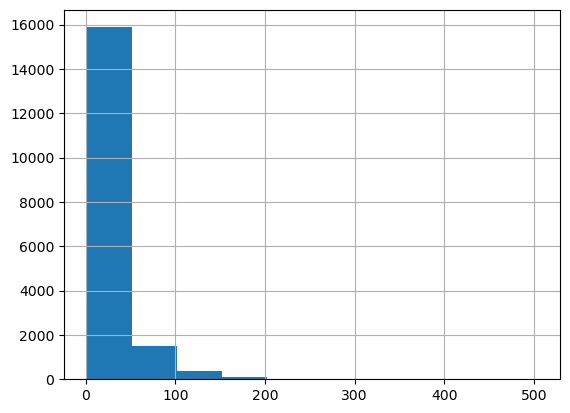

In [18]:
#histograma
#distribuição dos graus
degree_list = [degree for node, degree in H.degree]
degree_list = pd.Series(degree_list)
degree_list.hist();

In [19]:
#descrevendo o histograma
#grau medio é 22
#mas um pesquisador  que colaborou com 504 pessoas diferentes,um grau bem diferente da media, calda longa
degree_list.describe()

count    17903.000000
mean        22.010948
std         31.016923
min          1.000000
25%          4.000000
50%         10.000000
75%         28.000000
max        504.000000
dtype: float64

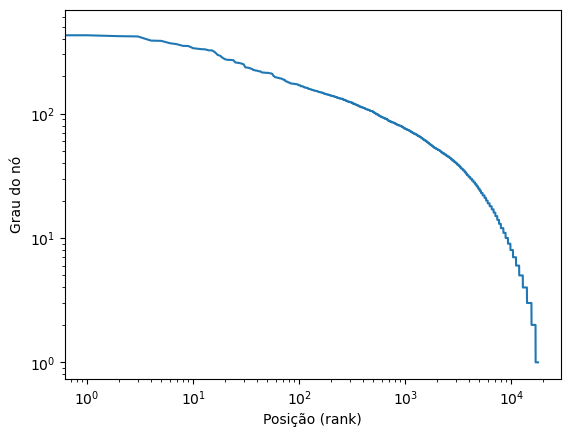

In [20]:
#grafico de ranqueamento
# escala logaritimica
#É uma calda longa mas não é uma rete, sugerindo que não é uma lei de potencia
y = degree_list.sort_values(ascending=False)
x = range(len(y))
plt.plot(x, y)
plt.loglog()
plt.xlabel('Posição (rank)')
plt.ylabel('Grau do nó');

In [21]:
#Distancias
#diametro é 14 (em 14 passos no piores dos casos chego de um pesquisador a outro)
nx.algorithms.approximation.diameter(H)

14

In [22]:
#filtrando nos com graus mais altos
top_nodes = [node for node, degree in H.degree if degree > 350]
top_nodes

['1086',
 '21718',
 '35290',
 '38109',
 '53213',
 '92790',
 '89732',
 '93504',
 '62821']

In [24]:
#o nó 1086 consegue chegar em media em 3 passoas a qualquer outro nó
istances = nx.shortest_path_length(H, '1086')
distances = pd.Series(distances)
distances.describe()

count    17903.000000
mean         2.875663
std          0.845950
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          9.000000
dtype: float64

In [25]:
#esse nó tbm chega em media a 3 passos a qualquer outro nó
distances = nx.shortest_path_length(H, '62821')
distances = pd.Series(distances)
distances.describe()

count    17903.000000
mean         2.858459
std          0.844698
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          9.000000
dtype: float64

In [26]:
#no momento que cria uma aresta entre todos os autores é esperado uma clusterização alta
#no caso o resultado aqui foi 64%
nx.algorithms.approximation.average_clustering(H)

0.639

In [27]:
#comparando com uma rede aleatoria ERDOS-Renyi
#grapho aleatorio
#com o msm numero de nós
#com a mesma densidade para escolher o parametro Pdo modelo
num_nodes = G.number_of_nodes()
density = nx.density(G)
random_graph = nx.erdos_renyi_graph(num_nodes, density, seed=42)
print(random_graph)

Graph with 18772 nodes and 197308 edges


In [28]:
#clusterização em uma rede aleatoria é menor
nx.algorithms.approximation.average_clustering(H)

0.633

In [29]:
nx.algorithms.approximation.average_clustering(random_graph)

0.001

In [30]:
nx.number_connected_components(G)

290

In [31]:
#numero de componentes conexas em redes aleatorias comumente são 1, ou seja todo mundo conectado
nx.number_connected_components(random_graph)

1

In [32]:
nx.algorithms.approximation.diameter(H)

14

In [33]:
#diametro é bem menor comparado ao H
nx.algorithms.approximation.diameter(random_graph)

5

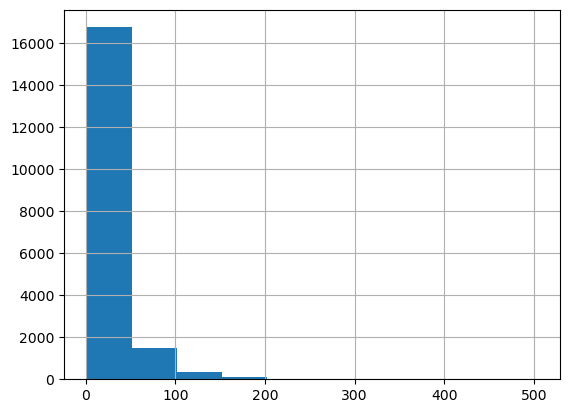

In [34]:
degree_list = [degree for node, degree in G.degree]
degree_list = pd.Series(degree_list)
degree_list.hist();

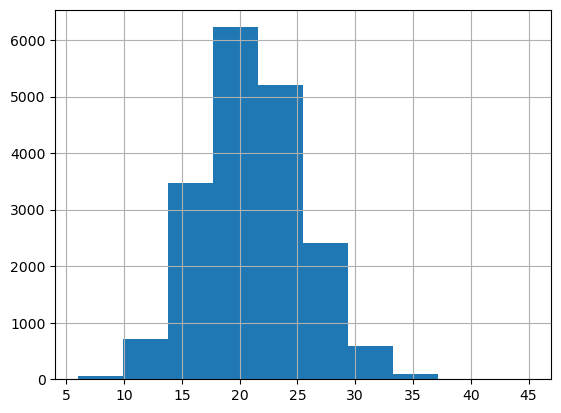

In [35]:
#distribuição aleatoria é normal/ distribuição binomial
rng_degree_list = [degree for node, degree in random_graph.degree]
rng_degree_list = pd.Series(rng_degree_list)
rng_degree_list.hist();

In [36]:
#dataset/ fotografia tirado em 2007
#utilizando a função pra baixar o arquivo

url = 'https://snap.stanford.edu/data/as-caida20071105.txt.gz'
file_path = download_file(url)
file_path

'as-caida20071105.txt.gz'

In [37]:
#desta vez o arquivo tem pesos
#lendo o arquivo com uma lista de arestas
#Baixa densidade comparada com a rede anterior
G = nx.read_weighted_edgelist(file_path)
print(G)

Graph with 26475 nodes and 53381 edges


In [38]:
#10x menor que a rede anterior
nx.density(G)

0.0001523214859084934

In [39]:
#é esperado que seja conectado por haver só uma componente conexa
nx.is_connected(G)

True

In [40]:
#só uma componente conexa
nx.number_connected_components(G)

1

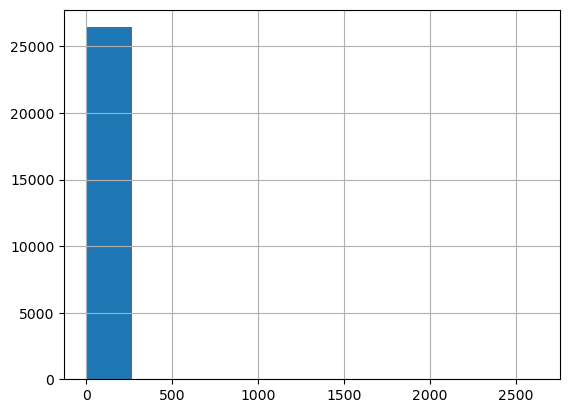

In [41]:
#histograma
#lista de graus
#muito nós com graus baixos
# 1 com grau 2500
degree_list = [degree for node, degree in G.degree]
degree_list = pd.Series(degree_list)
degree_list.hist();

In [42]:
#75% com grau 2
degree_list.describe()

count    26475.000000
mean         4.032559
std         33.374795
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max       2628.000000
dtype: float64

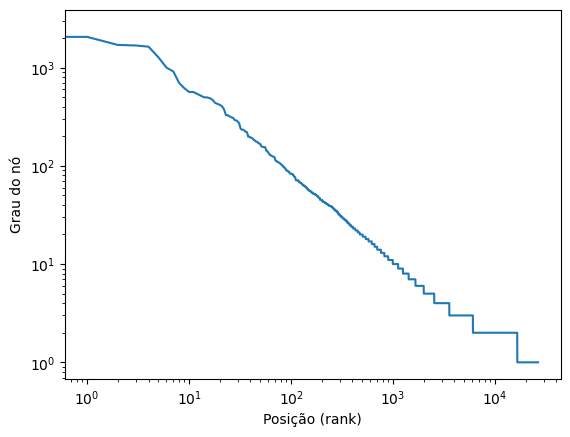

In [43]:
#plotando é percepitivel uma reta logo segue uma lei de potencia
# logo existe uma chance de existir um nó com grau ainda maior e quanto mais a internet crescer vai ser possivel ver isso
y = degree_list.sort_values(ascending=False)
x = range(len(y))
plt.plot(x, y)
plt.loglog()
plt.xlabel('Posição (rank)')
plt.ylabel('Grau do nó');

In [44]:
#distancias
#diametro 17 (de um nó ao outro nó pode ter até 17 passos)
nx.algorithms.approximation.diameter(G)

17

In [45]:
top_nodes = [node for node, degree in G.degree if degree > 1500]
top_nodes

['174', '3356', '7018', '701', '1239']

In [46]:
#xemplos de distancias
distances = nx.shortest_path_length(G, '174')
distances = pd.Series(distances)
distances.describe()

count    26475.000000
mean         2.421870
std          0.728787
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
dtype: float64

In [47]:
#exemplos de distancias
distances = nx.shortest_path_length(G, '3356')
distances = pd.Series(distances)
distances.describe()

count    26475.000000
mean         2.330538
std          0.675398
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
dtype: float64

In [48]:
#clusterização em torno de 22%
#não faz muito sentido em questão de eficiencia
nx.algorithms.approximation.average_clustering(G)

0.222

In [49]:
#comparando com rede aleatoria
num_nodes = G.number_of_nodes()
density = nx.density(G)
random_graph = nx.erdos_renyi_graph(num_nodes, density, seed=42)
print(random_graph)

Graph with 26475 nodes and 53285 edges


In [50]:
#como seria uma internet se fosse rede aleatoria?

nx.algorithms.approximation.average_clustering(G)

0.216

In [51]:
#coeficiente de clusterização é 0
nx.algorithms.approximation.average_clustering(random_graph)

0.0

In [52]:
nx.number_connected_components(G)

1

In [53]:
#numero de componentes é maior
#rola o incentivo da internet ser conectada enquanto na rede aleatoria não por não ter obrigação de conectividade
nx.number_connected_components(random_graph)

474

In [54]:
#diametro 
nx.algorithms.approximation.diameter(G)

17

In [55]:
#não consegue calcular por não ser conectado
nx.algorithms.approximation.diameter(random_graph)

NetworkXError: Graph not connected.

In [56]:
#pega maior componente do grapho aleatorio
components = nx.connected_components(random_graph)
nodes = max(components, key=len)
random_graph_comp = random_graph.subgraph(nodes)
print(random_graph_comp)

Graph with 25980 nodes and 53263 edges


In [57]:
#diametro é 15
nx.algorithms.approximation.diameter(random_graph_comp)

15

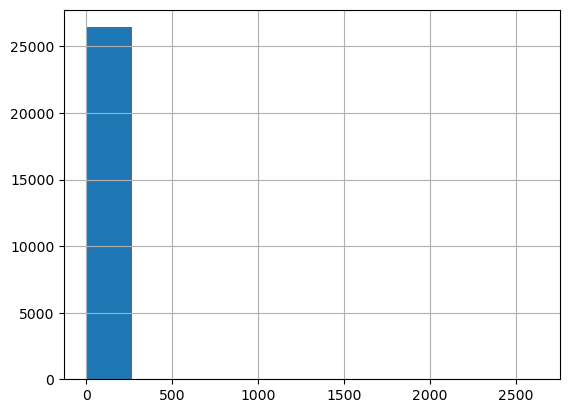

In [58]:
#muitos nós com graus pequenos e poucos com centralidade de grau maior, com muitas conexões
degree_list = [degree for node, degree in G.degree]
degree_list = pd.Series(degree_list)
degree_list.hist();

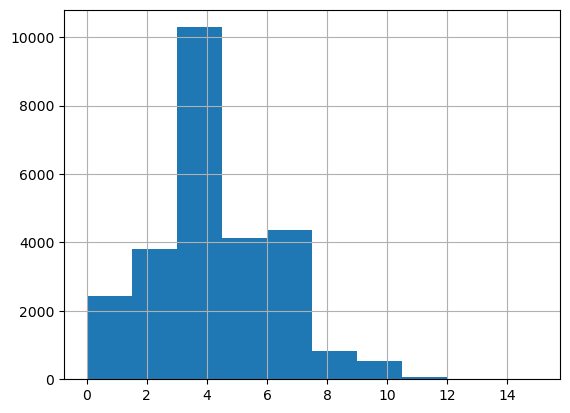

In [59]:
#rede aleatoria é distribuida de forma normal, alguns nós com  grau 4 mas não foge mt disso
rng_degree_list = [degree for node, degree in random_graph.degree]
rng_degree_list = pd.Series(rng_degree_list)
rng_degree_list.hist();

In [60]:
#rede de infraestrutura
#ruas, avenidas, etc

#Inteseções: são nós
#estradas: arestas

#rede fisica/ geometrica


#metricas: distancias, conectividade, distribuição de graus e clusterização

#download do arquivo
url = 'https://snap.stanford.edu/data/roadNet-PA.txt.gz'
file_path = download_file(url)
file_path

'roadNet-PA.txt.gz'

In [61]:
#nós e arestas

G = nx.read_edgelist(file_path, create_using=nx.DiGraph)
print(G)

DiGraph with 1088092 nodes and 3083796 edges


In [62]:
#densidade da rede
#densidade baixa
nx.density(G)

2.6046825795723353e-06

In [63]:
#não fortemente conexa
#não é possivel chegar a qualquer nó, nós desconecatdos
nx.is_strongly_connected(G)

False

In [64]:
nx.number_strongly_connected_components(G)

206

In [65]:
#analisando o componente de maior comprimento
#rede totalmente conectada
components = nx.strongly_connected_components(G)
nodes = max(components, key=len)
H = G.subgraph(nodes)
print(H)

DiGraph with 1087562 nodes and 3083028 edges


In [66]:
#comparando com o total
#99,9% de todos os nós
H.number_of_nodes() / G.number_of_nodes()

0.9995129088349147

In [67]:
#arestas tambem fortemente conexas
H.number_of_edges() / G.number_of_edges()

0.9997509562889374

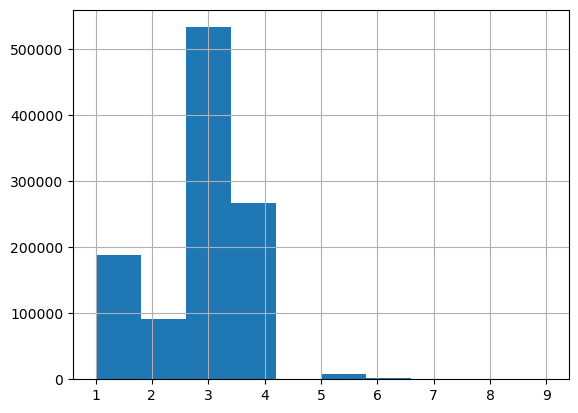

In [68]:
#distribuição dos graus
#analisando graus de entrada e saida
#rede regular
#grande parte tem 2/3/4 ruas, dificil fugir disso
in_degree_list = [degree for node, degree in G.in_degree]
in_degree_list = pd.Series(in_degree_list)
in_degree_list.hist();

In [69]:
#dando describe no grafico anterior
in_degree_list.describe()

count    1.088092e+06
mean     2.834132e+00
std      1.016930e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      9.000000e+00
dtype: float64

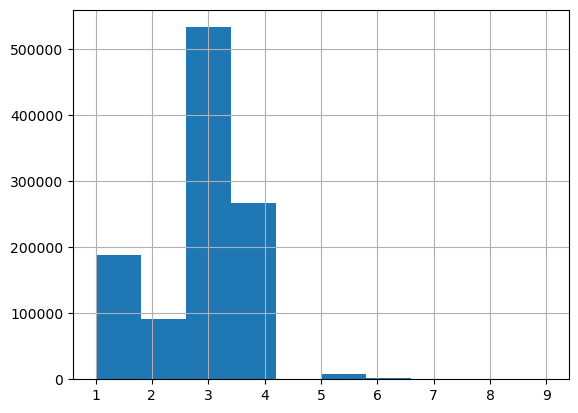

In [70]:
out_degree_list = [degree for node, degree in G.out_degree]
out_degree_list = pd.Series(out_degree_list)
out_degree_list.hist();

In [71]:
out_degree_list.describe()

count    1.088092e+06
mean     2.834132e+00
std      1.016930e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      9.000000e+00
dtype: float64

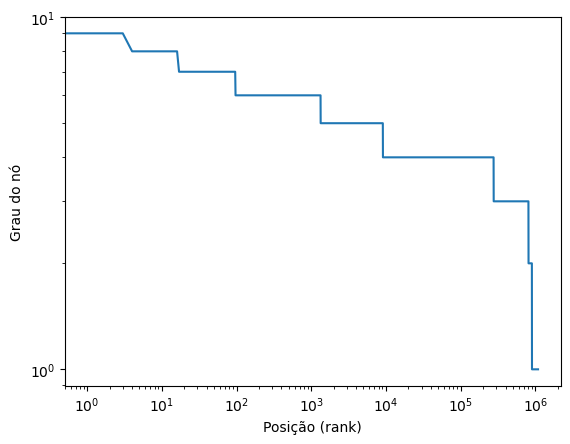

In [72]:
#não existe grafico de calda longa pelo grau maximo ser muito proximo da media
y = in_degree_list.sort_values(ascending=False)
x = range(len(y))
plt.plot(x, y)
plt.loglog()
plt.xlabel('Posição (rank)')
plt.ylabel('Grau do nó');

In [73]:
#diametro
#valor alto
#contexto dos nós são ruas
nx.algorithms.approximation.diameter(H)

792

In [74]:

distances = nx.shortest_path_length(H, '0')
distances = pd.Series(distances)
distances.describe()undirected = nx.to_undirected(H)
print(undirected)

count    1.087562e+06
mean     2.857163e+02
std      1.085169e+02
min      0.000000e+00
25%      2.070000e+02
50%      2.940000e+02
75%      3.610000e+02
max      5.410000e+02
dtype: float64

In [75]:
#convertendo pra uma rede não direcionada
undirected = nx.to_undirected(H)
print(undirected)

Graph with 1087562 nodes and 1541514 edges


In [76]:
#após converter para uma rede não direcionada é aplicado a clusterização
#baixa clusterização
nx.algorithms.approximation.average_clustering(undirected)

0.046

In [77]:
#comparando com rede aleatoria
#utilizaremos equações para gerar uma rede aleatoria
n = G.number_of_nodes()
p = nx.density(G)
n, p

(1088092, 2.6046825795723353e-06)

In [78]:
#clusterização da rede aleatoria = densidade
random_graph_clustering = p
random_graph_clustering

2.6046825795723353e-06

In [79]:
#grau medio
#densidade * (numeros de nós - 1)
mean_degree = p * (n - 1)
mean_degree

2.834131672689442

In [80]:
#diametro
random_graph_diameter = np.log(n) / np.log(mean_degree)
random_graph_diameter

13.343055795874397

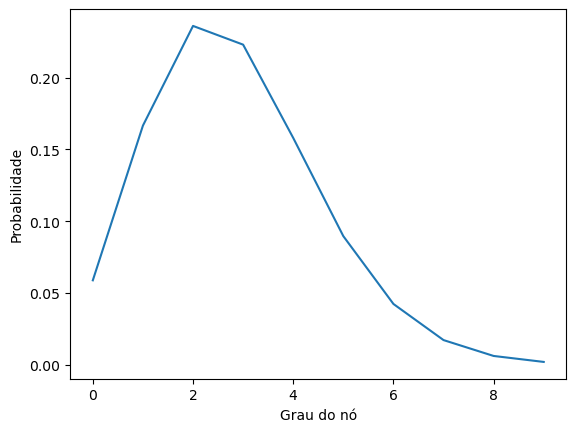

In [81]:
degree_dist = scipy.stats.binom(n - 1, p)
x = np.arange(10)
y = degree_dist.pmf(x)
plt.plot(x, y)
plt.xlabel('Grau do nó')
plt.ylabel('Probabilidade');

C:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


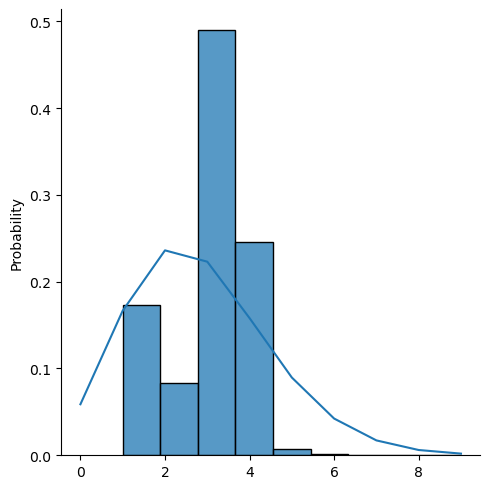

In [82]:
#binomial junto da distribuição de graus da rede normal
sns.displot(in_degree_list, stat='probability', bins=9)
plt.plot(x, y);

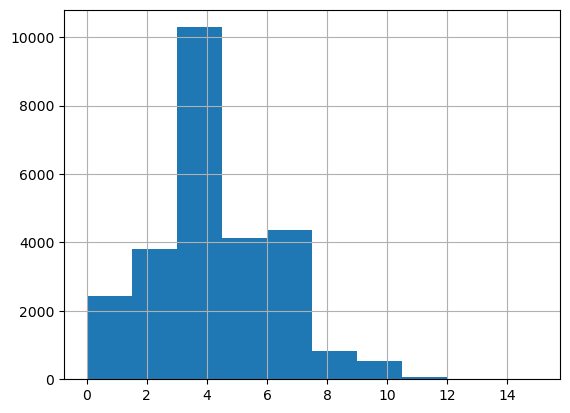

In [83]:
rng_degree_list = [degree for node, degree in random_graph.degree]
rng_degree_list = pd.Series(rng_degree_list)
rng_degree_list.hist();

In [84]:
#redes sociais

url = 'https://snap.stanford.edu/data/soc-Slashdot0811.txt.gz'
file_path = download_file(url)
file_path

'soc-Slashdot0811.txt.gz'

In [85]:
#nós e arestas
G = nx.read_edgelist(file_path, create_using=nx.DiGraph)
print(G)

DiGraph with 77360 nodes and 905468 edges


In [86]:
#densidade
nx.density(G)

0.0001513023935343928

In [87]:
#não fortemente conexa
nx.is_strongly_connected(G)

False

In [88]:
#6724 componentes fortemente conexa
nx.number_strongly_connected_components(G)

6724

In [89]:
#pegando a maior para checar as conexões
components = nx.strongly_connected_components(G)
nodes = max(components, key=len)
H = G.subgraph(nodes)
print(H)

DiGraph with 70355 nodes and 888662 edges


In [90]:
#a maior está na variavel H
#ela tem 91% dos nós
#não é considerado muito comparando com outras redes
#continua sendo componente gigante
H.number_of_nodes() / G.number_of_nodes()

0.9094493278179938

In [91]:
#entre as arestas tem 98%
H.number_of_edges() / G.number_of_edges()

0.9814394324261045

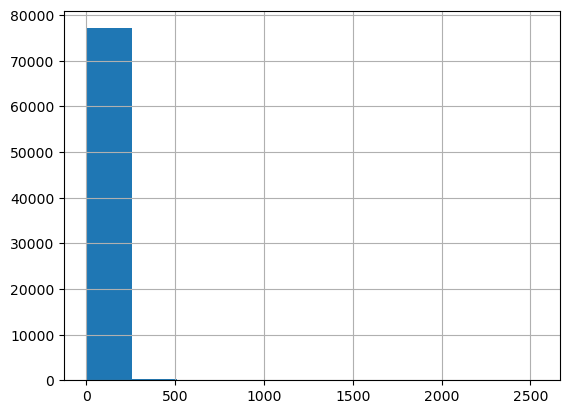

In [92]:
#grau de entrada
in_degree_list = [degree for node, degree in G.in_degree]
in_degree_list = pd.Series(in_degree_list)
in_degree_list.hist();

In [93]:
#media 11,7%
#mediana 3
in_degree_list.describe()

count    77360.000000
mean        11.704602
std         37.205199
min          1.000000
25%          2.000000
50%          3.000000
75%          8.000000
max       2540.000000
dtype: float64

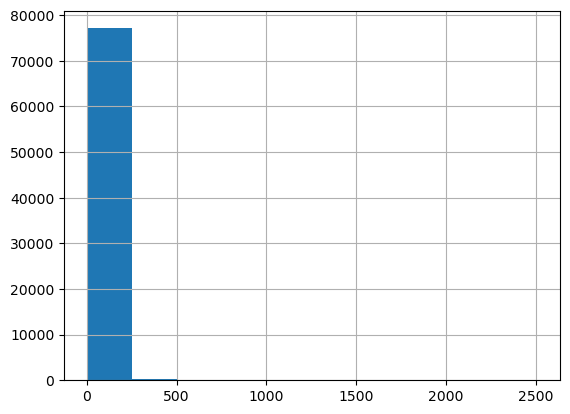

In [94]:
#grau de saida
#similar
out_degree_list = [degree for node, degree in G.out_degree]
out_degree_list = pd.Series(out_degree_list)
out_degree_list.hist();

In [95]:
out_degree_list.describe()

count    77360.000000
mean        11.704602
std         36.844128
min          0.000000
25%          2.000000
50%          3.000000
75%          7.000000
max       2508.000000
dtype: float64

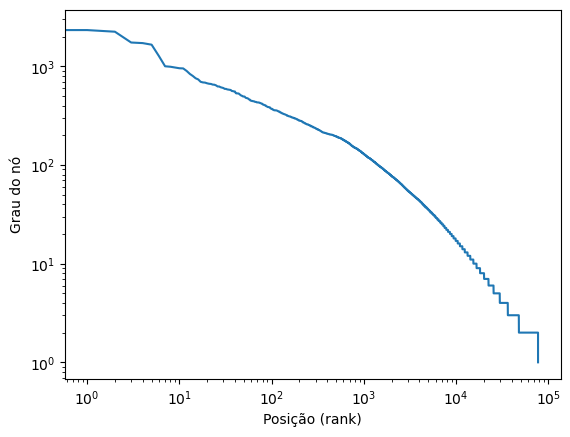

In [96]:
#há uma calda longa
#tem algumas pessoas com mais relacionamentos que as outras
#pode ser argumentado como grau de potencia 
y = in_degree_list.sort_values(ascending=False)
x = range(len(y))
plt.plot(x, y)
plt.loglog()
plt.xlabel('Posição (rank)')
plt.ylabel('Grau do nó');

In [97]:
#distancia
#diametro
#do pior caso ao outro pode dar até 12 passos
nx.algorithms.approximation.diameter(H)

12

In [98]:
#nó de exemplo
#dá pra chegar na maior parte dos casos em 3 passos
# no pior caso 7 passos
distances = nx.shortest_path_length(H, '0')
distances = pd.Series(distances)
distances.describe()

count    70355.00000
mean         3.09435
std          0.66968
min          0.00000
25%          3.00000
50%          3.00000
75%          3.00000
max          7.00000
dtype: float64

In [99]:
#convertendo pra rede não direcionada
undirected = nx.to_undirected(H)
print(undirected)

Graph with 70355 nodes and 529972 edges


In [100]:
#checando clusterização
#efeito mundo pequeno/ alta clusterização
#"meus amigos são amigos"
nx.algorithms.approximation.average_clustering(undirected)

0.595

In [101]:
#checando rede aleatoria
#comparando rede social a rede aleatoria
#seguindo caminho das formulas
n = G.number_of_nodes()
p = nx.density(G)
n, p

(77360, 0.0001513023935343928)

In [102]:
#clusterização = densidade(na rede aleatoria)
#qualquer aresta tem probabilidade existir igual a  P, vale para qualquer aresta, logo clusterização = densidade
random_graph_clustering = p
random_graph_clustering

0.0001513023935343928

In [103]:
#numero de componentes
mean_degree = p * (n - 1)
mean_degree

11.704601861427093

In [104]:
#diametro
#4,5 = baixo
#muitas opções de caminho
random_graph_diameter = np.log(n) / np.log(mean_degree)
random_graph_diameter

4.575734593499139

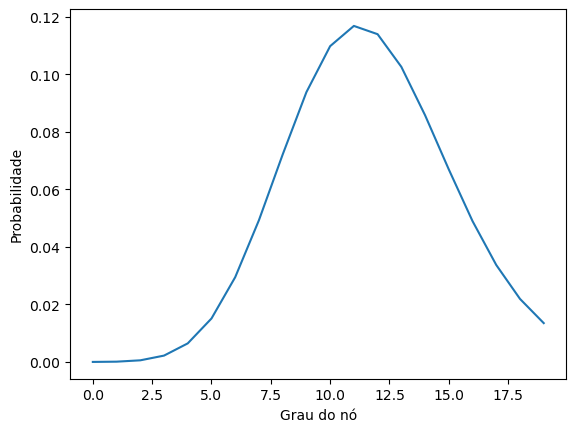

In [105]:
#distribuição de grau
#binomial
#pico perto da media
degree_dist = scipy.stats.binom(n - 1, p)
x = np.arange(20)
y = degree_dist.pmf(x)
plt.plot(x, y)
plt.xlabel('Grau do nó')
plt.ylabel('Probabilidade');

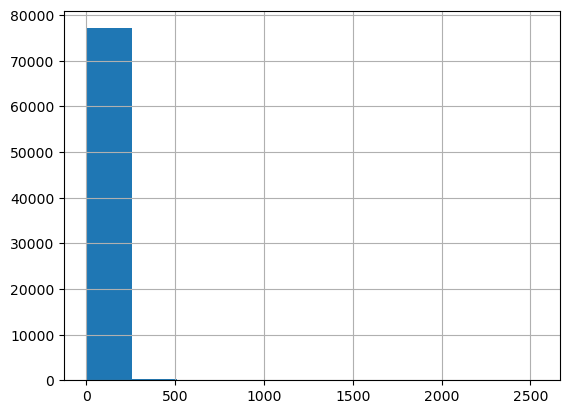

In [106]:
#mesmo que a media seja igual
#segue a uma lei de potencia
#comportamento distinto da rede aleatoria
in_degree_list.hist();